In [24]:
import pandas as pd


In [25]:
df = pd.read_csv("archive/NFLX.csv")


In [26]:
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [27]:
df = df[["Date", "Open", "High", "Low", "Close"]]


In [28]:
print(df.columns)


Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='str')


In [29]:
df["Date"] = pd.to_datetime(df["Date"])
df.info()


<class 'pandas.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1009 non-null   datetime64[us]
 1   Open    1009 non-null   float64       
 2   High    1009 non-null   float64       
 3   Low     1009 non-null   float64       
 4   Close   1009 non-null   float64       
dtypes: datetime64[us](1), float64(4)
memory usage: 39.5 KB


In [30]:
df_2021 = df[df["Date"] >= "2021-01-01"]


In [31]:
df_2021.head()


,Date,Open,High,Low,Close
733,2021-01-04,539.000000,540.799988,515.090027,522.859985
734,2021-01-05,521.549988,526.780029,515.890015,520.799988
735,2021-01-06,511.970001,513.099976,499.500000,500.489990
736,2021-01-07,508.279999,516.440002,506.420013,508.890015
737,2021-01-08,511.309998,513.239990,504.510010,510.399994


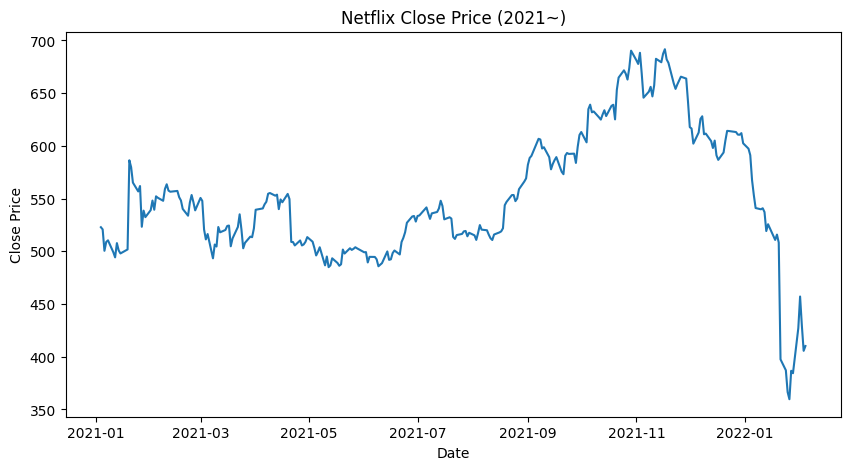

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(df_2021["Date"], df_2021["Close"])
plt.title("Netflix Close Price (2021~)")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()


In [33]:
max_close = df_2021["Close"].max()
min_close = df_2021["Close"].min()

print("최고 종가:", max_close)
print("최저 종가:", min_close)


최고 종가: 691.690002
최저 종가: 359.700012


In [35]:
df_2021_monthly = (
    df_2021
    .set_index("Date")
    .resample("ME")["Close"]
    .mean()
)

df_2021_monthly.head()

Date
2021-01-31    526.816845
2021-02-28    548.959999
2021-03-31    518.123482
2021-04-30    533.136662
2021-05-31    496.714497
Freq: ME, Name: Close, dtype: float64

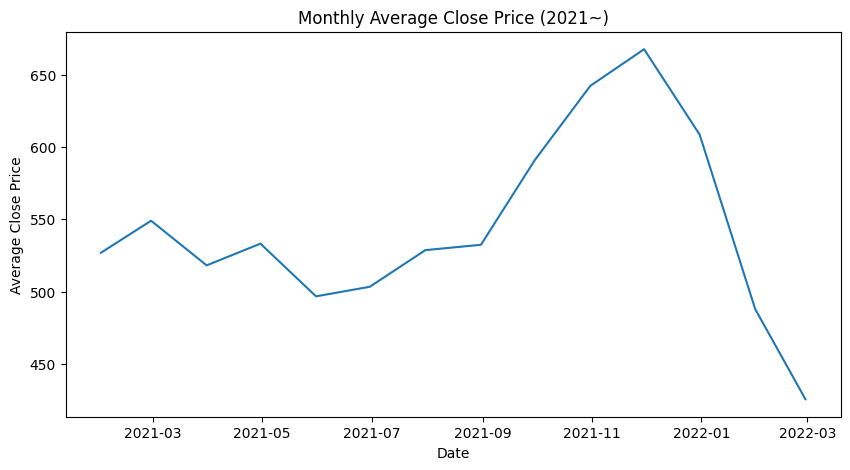

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(df_2021_monthly.index, df_2021_monthly.values)
plt.title("Monthly Average Close Price (2021~)")
plt.xlabel("Date")
plt.ylabel("Average Close Price")
plt.show()


In [37]:
df_2022 = df[df["Date"] >= "2022-01-01"]
df_2022.head()


,Date,Open,High,Low,Close
985,2022-01-03,605.609985,609.989990,590.559998,597.369995
986,2022-01-04,599.909973,600.409973,581.599976,591.150024
987,2022-01-05,592.000000,592.840027,566.880005,567.520020
988,2022-01-06,554.340027,563.359985,542.010010,553.289978
989,2022-01-07,549.460022,553.429993,538.219971,541.059998


In [38]:
monthly_high = df_2022.set_index("Date").resample("ME")["High"].max()
monthly_low  = df_2022.set_index("Date").resample("ME")["Low"].min()
monthly_close = df_2022.set_index("Date").resample("ME")["Close"].last()


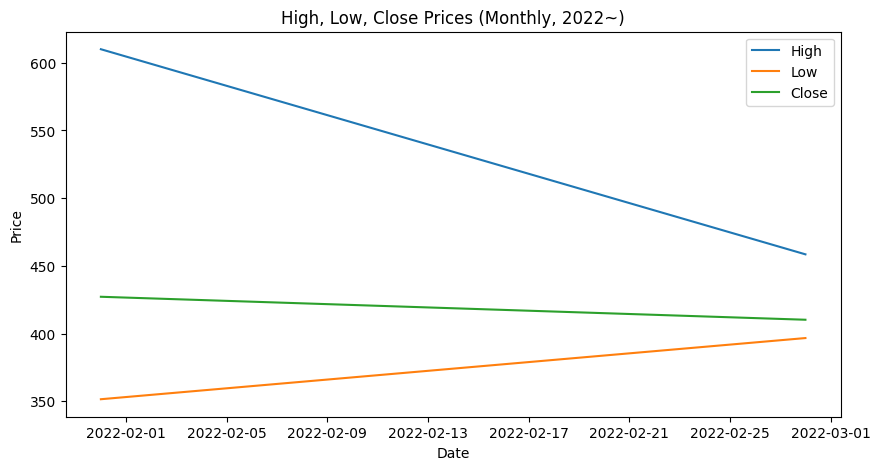

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(monthly_high.index, monthly_high.values, label="High")
plt.plot(monthly_low.index, monthly_low.values, label="Low")
plt.plot(monthly_close.index, monthly_close.values, label="Close")

plt.title("High, Low, Close Prices (Monthly, 2022~)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


# 넷플릭스 주가 데이터 분석 (02_pjt)

## 1. 프로젝트 개요
- Kaggle에서 제공하는 Netflix 주가 데이터를 활용하여
  Pandas와 Matplotlib으로 시계열 데이터 분석을 수행하였다.
- 데이터 전처리 → 분석 → 시각화의 전체 흐름을 경험하는 것이 목적이다.

---

## 2. 사용 기술
- Python
- Pandas
- Matplotlib

---

## 3. 데이터 설명
- 데이터 출처: Kaggle - Netflix Stock Price Prediction
- 사용 컬럼:
  - Date
  - Open
  - High
  - Low
  - Close

---

## 4. 구현 내용

### (1) CSV 데이터 로드 및 전처리
- Pandas를 이용해 CSV 파일을 DataFrame으로 로드하였다.
- 분석에 필요한 5개 컬럼만 선택하여 사용하였다.

### (2) 날짜 데이터 처리
- Date 컬럼을 datetime 타입으로 변환하였다.
- 2021년 이후 데이터만 필터링하여 분석을 진행하였다.

### (3) 데이터 분석
- 2021년 이후 종가(Close)의 최고값과 최저값을 계산하였다.
- 월별 평균 종가를 계산하여 추세를 확인하였다.

### (4) 데이터 시각화
- 2021년 이후 종가 변화 추이를 선 그래프로 시각화하였다.
- 2022년 이후 데이터를 기준으로 월별 최고가, 최저가, 종가를
  하나의 그래프로 시각화하였다.

---

## 5. 어려웠던 점
- Pandas 버전에 따라 resample("M") 사용 시 오류가 발생하였다.
- 오류 메시지를 확인하여 "ME" 옵션으로 수정하여 해결하였다.

---

## 6. 느낀 점
- 실제 금융 데이터를 직접 다뤄보며 데이터 분석의 전체 흐름을 이해할 수 있었다.
- Pandas를 활용한 데이터 전처리와 시각화의 중요성을 체감했다.


- 분석 대상: Netflix 주가 데이터
- 기간: 2021년 ~ 2024년
- 특징:
  * 2021년 초 대비 2022년에 주가 하락폭이 큼
  * 2023년 이후 점진적 회복 흐름
  * 월별 평균 종가 기준으로 변동성은 줄어드는 추세

  
  
다음은 Netflix 주가 데이터를 분석한 요약이다.

- 2021년 이후 데이터를 기준으로 분석하였다.
- 2022년에 주가가 크게 하락하였고,
  2023년 이후에는 점진적인 회복 추세를 보였다.
- 월별 평균 종가 기준으로 변동성은 점차 감소하는 경향을 보인다.

이 데이터를 기반으로,
1) 주가 흐름의 특징을 요약해주고
2) 투자 관점에서 주의할 점을 설명해줘.




Netflix 주가의 과거 데이터(2021~2024)를 기반으로
향후 주가 흐름을 예측하려고 한다.

단,
- 실제 투자 판단이 아닌
- 데이터 분석 학습 목적이다.

과거 주가 흐름의 패턴을 기준으로
향후 주가가 어떤 방향성을 가질 가능성이 있는지 설명하고,
이 예측의 한계도 함께 설명해줘.




## 7. 생성형 AI를 활용한 주가 해석 (심화)

과거 주가 데이터를 요약하여 생성형 AI에게
주가 흐름 해석 및 향후 방향성에 대해 질문하였다.

AI는 2022년 주가 하락 이후
2023년부터 점진적인 회복 흐름을 보인 점을 근거로
단기적 변동성은 존재하지만
중장기적으로는 안정화 가능성을 언급하였다.

다만, 실제 기업 실적, 시장 상황, 외부 변수 등을
반영하지 못하므로
해당 예측은 참고 수준으로만 활용해야 함을 강조하였다.
